# Load File

In [1]:
import pandas as pd
#Read the CSV file 'Churn_Modelling.csv' into a DataFrame named 'df' 
df = pd.read_csv('/Users/laiminyun/CIS 508/Group Project/Churn_Modelling.csv')

In [2]:
# Show the first few rows to understand the structure and content
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,$0.00,1,1,1,"$101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"$83,807.86",1,0,1,"$112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"$159,660.80",3,1,0,"$113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,$0.00,2,0,0,"$93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"$125,510.82",1,1,1,"$79,084.10",0


In [3]:
df.shape

(10000, 14)

In [4]:
# Drop rows where the target variable or any of the specified columns have missing values
df = df.dropna()
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber           int64
CustomerId          int64
Surname            object
CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance            object
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary    object
Exited              int64
dtype: object

# Convert categorical variables to numerical variables ( 0 and 1)

In [6]:
# Geography column
unique_Geography = df['Geography'].unique()
df = pd.get_dummies(df, columns=['Geography'], prefix='Geography')
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,Female,42,2,$0.00,1,1,1,"$101,348.88",1,1,0,0
1,2,15647311,Hill,608,Female,41,1,"$83,807.86",1,0,1,"$112,542.58",0,0,0,1
2,3,15619304,Onio,502,Female,42,8,"$159,660.80",3,1,0,"$113,931.57",1,1,0,0
3,4,15701354,Boni,699,Female,39,1,$0.00,2,0,0,"$93,826.63",0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,"$125,510.82",1,1,1,"$79,084.10",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Male,39,5,$0.00,2,1,0,"$96,270.64",0,1,0,0
9996,9997,15569892,Johnstone,516,Male,35,10,"$57,369.61",1,1,1,"$101,699.77",0,1,0,0
9997,9998,15584532,Liu,709,Female,36,7,$0.00,1,0,1,"$42,085.58",1,1,0,0
9998,9999,15682355,Sabbatini,772,Male,42,3,"$75,075.31",2,1,0,"$92,888.52",1,0,1,0


In [7]:
# Remove currency symbols and commas
df['EstimatedSalary'] = df['EstimatedSalary'].str.replace('[\$,]', '', regex=True)

# Convert the column to a numeric type
df['EstimatedSalary'] = pd.to_numeric(df['EstimatedSalary'])

In [8]:
# Remove currency symbols and commas
df['Balance'] = df['Balance'].str.replace('[\$,]', '', regex=True)

# Convert the column to a numeric type
df['Balance'] = pd.to_numeric(df['Balance'])

In [9]:
# Assume 'CustomerId', 'Surname' are irrelevant features
df.drop(['RowNumber','CustomerId', 'Surname','Gender'], axis=1, inplace=True)

In [10]:
# Separating the features and the target variable
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target

# Modeling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.829
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.60      0.38      0.47       393

    accuracy                           0.83      2000
   macro avg       0.73      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



# Summary

# Confusion Matrix

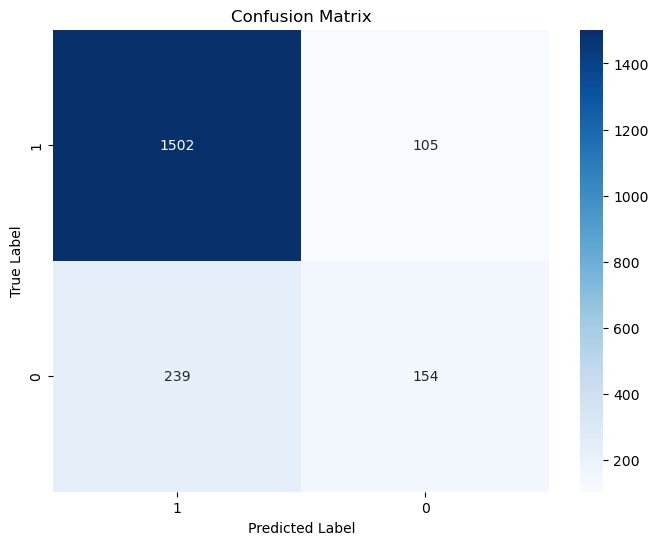

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming y_test_stratified_extended_bow and y_pred_stratified_extended_bow are your true and predicted labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
Exited = df['Exited'].unique()
conf_matrix_df = pd.DataFrame(conf_matrix, index=Exited, columns=Exited)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()